### Deliverable 1: Preprocessing the Data for a Neural Network

In [48]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.copy().drop(columns = ["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
AT_counts = application_df["APPLICATION_TYPE"].value_counts()
AT_counts_filtered = AT_counts[AT_counts > 10]
AT_counts_filtered

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

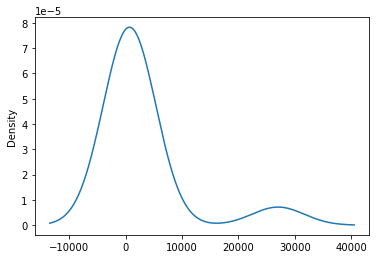

In [5]:
# Visualize the value counts of APPLICATION_TYPE
AT_counts_filtered.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(AT_counts[AT_counts < 200].index)
replace_application
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
CL_counts = application_df["CLASSIFICATION"].value_counts()
CL_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

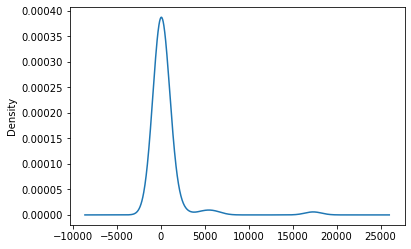

In [8]:
# Visualize the value counts of CLASSIFICATION
CL_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(CL_counts[CL_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
Merge_df = application_df.merge(encode_df,left_index=True, right_index=True)
Merge_df = Merge_df.drop(application_cat,1)
Merge_df.head()

/var/folders/r2/5pp2k__9305_l57mznwmt09w0000gn/T/ipykernel_4412/3244043847.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Merge_df = Merge_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = Merge_df["IS_SUCCESSFUL"].values
X = Merge_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/var/folders/r2/5pp2k__9305_l57mznwmt09w0000gn/T/ipykernel_4412/1358400151.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = Merge_df.drop(["IS_SUCCESSFUL"],1).values


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[ 0.01394306, -0.03348439, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       ...,
       [ 0.01394306, -0.03229417, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.01093629, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425]])

### Deliverable 2: Compile, Train and Evaluate the Model

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 70
hidden_nodes_layer2 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 70)                3080      
                                                                 
 dense_34 (Dense)            (None, 15)                1065      
                                                                 
 dense_35 (Dense)            (None, 1)                 16        
                                                                 
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=10, callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/10
  1/804 [..............................] - ETA: 3:43 - loss: 26892.8457 - accuracy: 0.5625
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 2s - loss: 14060.8750 - accuracy: 0.5297  
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 38431.8438 - accuracy: 0.5141
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 41597.4805 - a


Epoch 1: saving model to checkpoints/weights.01.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 18301.1973 - accuracy: 0.4969
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 18522.9453 - accuracy: 0.4942
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 18151.9668 - accuracy: 0.4928
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
608/804 [=====================>...


Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 12091.8975 - accuracy: 0.5007
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 13589.7012 - accuracy: 0.4968
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 14182.9570 - accuracy: 0.4938
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoi

 21/804 [..............................] - ETA: 1s - loss: 4096.9326 - accuracy: 0.5134
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 42/804 [>.............................] - ETA: 1s - loss: 8248.6621 - accuracy: 0.5238
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 64/804 [=>............................] - ETA: 1s - loss: 6279.9380 - accuracy: 0.5024
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 85/804 [==>.........................

566/804 [====================>.........] - ETA: 0s - loss: 27517.0273 - accuracy: 0.5099
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 26581.4551 - accuracy: 0.5073
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 25698.2168 - accuracy: 0.5057
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
628/804 [======================>..


Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 6428.2817 - accuracy: 0.5281
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 6055.7339 - accuracy: 0.5255
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
354/804 [============>.................] - ETA: 1s - loss: 5731.9263 - accuracy: 0.5223
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints


Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
 42/804 [>.............................] - ETA: 1s - loss: 7490.4917 - accuracy: 0.4754
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
 63/804 [=>............................] - ETA: 1s - loss: 6558.8667 - accuracy: 0.4722
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 6701.0132 - accuracy: 0.4725
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints


Epoch 5: saving model to checkpoints/weights.05.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 10384.7383 - accuracy: 0.5120
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 10045.1396 - accuracy: 0.5131
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 9947.1895 - accuracy: 0.5123 
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
646/804 [=======================>.

314/804 [==========>...................] - ETA: 1s - loss: 4432.8101 - accuracy: 0.5376
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 4454.5732 - accuracy: 0.5348
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
356/804 [============>.................] - ETA: 1s - loss: 4648.9058 - accuracy: 0.5316
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
377/804 [=============>..............

 41/804 [>.............................] - ETA: 1s - loss: 854.0620 - accuracy: 0.5328
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 1183.4105 - accuracy: 0.5128
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 4174.8442 - accuracy: 0.5170
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
102/804 [==>...........................] - ETA: 1s - loss: 12837.3750 - accuracy: 0.5233
Epo


Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 11539.4482 - accuracy: 0.5262
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 11148.5703 - accuracy: 0.5265
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 10765.2930 - accuracy: 0.5261
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoi

320/804 [==========>...................] - ETA: 1s - loss: 39442.3672 - accuracy: 0.5170
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 37107.3359 - accuracy: 0.5189
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
364/804 [============>.................] - ETA: 1s - loss: 35064.9219 - accuracy: 0.5184
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
385/804 [=============>...........


Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 65/804 [=>............................] - ETA: 1s - loss: 3525.6509 - accuracy: 0.5048
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 86/804 [==>...........................] - ETA: 1s - loss: 3297.5869 - accuracy: 0.5174
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 2722.5596 - accuracy: 0.5177
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints


Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 4042.0771 - accuracy: 0.5320
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 3958.8462 - accuracy: 0.5322
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 3831.0593 - accuracy: 0.5326
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints

341/804 [===========>..................] - ETA: 1s - loss: 31232.5508 - accuracy: 0.5482
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
364/804 [============>.................] - ETA: 1s - loss: 29276.3730 - accuracy: 0.5552
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
386/804 [=============>................] - ETA: 1s - loss: 27688.9180 - accuracy: 0.5536
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
408/804 [============